<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-data" data-toc-modified-id="Model-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model data</a></span></li><li><span><a href="#import-data" data-toc-modified-id="import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import data</a></span></li><li><span><a href="#encode-target-variable" data-toc-modified-id="encode-target-variable-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>encode target variable</a></span></li><li><span><a href="#modeling-functions" data-toc-modified-id="modeling-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>modeling functions</a></span></li><li><span><a href="#kmeans-clustering" data-toc-modified-id="kmeans-clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>kmeans clustering</a></span></li><li><span><a href="#decision-tree-grid-search" data-toc-modified-id="decision-tree-grid-search-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>decision tree grid search</a></span></li><li><span><a href="#prep-data-(split-/-scale)" data-toc-modified-id="prep-data-(split-/-scale)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>prep data (split / scale)</a></span></li><li><span><a href="#model-2" data-toc-modified-id="model-2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>model 2</a></span></li></ul></div>

# Model data

In [7]:
import tensorflow as tf

In [6]:
#import libraries 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras import models, layers, optimizers, initializers, callbacks, regularizers
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc, make_scorer
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd 
import scipy
from scipy import stats
import geopandas as gpd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# general modules
import numpy as np
from tqdm import tqdm

Using TensorFlow backend.


# import data

In [8]:
dataComp = pd.read_csv('Xfeat_target.csv')
#dataFeat = pd.read_csv('dataFeatures.csv')
X_ext = pd.read_csv('Xft100_.csv')
dataRms = pd.read_csv('dataRms_.csv')
#catOhe = pd.read_csv('catOhe.csv')
catLe = pd.read_csv('catEnc.csv')
#stats  = pd.read_csv('stat1002.csv')

In [9]:
#drop unnamed:0 column
dataRms.drop(columns=['Unnamed: 0'], inplace=True)
dataComp.drop(columns=['Unnamed: 0'], inplace=True)
#catOhe.drop(columns=['Unnamed: 0'], inplace=True)
catLe.drop(columns=['Unnamed: 0'], inplace=True)
X_ext.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
#X = pd.concat([dataFeat, dataRms], axis=1)

In [14]:
#X_le = pd.concat([X, catLe], axis=1)

In [15]:
#X_ohe = pd.concat([X, catOhe], axis=1)

In [10]:
X_lex = pd.concat([X_ext, catLe], axis=1)

In [11]:
X_lex = pd.concat([X_ext, dataRms], axis=1)



#  encode target variable

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
target = dataComp.target

In [14]:
target

0       warvir
1       warvir
2       bnhcow
3       daejun
4       daejun
         ...  
3195    swaspa
3196    comgra
3197    gockin
3198    comgra
3199    whcspa
Name: target, Length: 3200, dtype: object

In [15]:
le = LabelEncoder()

In [16]:
y_enc = le.fit_transform(target)

In [17]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y_enc)

In [18]:
dummy_y.shape

(3200, 32)

# modeling functions

In [19]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [20]:
def acc_plot(model_dict):
    p_values = model_dict['accuracy']
    loss_values = model_dict['loss']
    pv_values = model_dict['val_accuracy']
    lossv_values = model_dict['val_loss']


    epochs = range(1, len(loss_values) + 1)

    # Plot the training loss vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, loss_values, 'b', label='Training loss')

    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Plot the training precision vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, p_values, 'r', label='Training Accuracy')


    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()
    

    
    # Plot the training loss vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, lossv_values, 'b', label='Validation loss')

    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
       # Plot the training precision vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, pv_values, 'r', label='Validation Accuracy')


    plt.title('Training Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()
    

In [21]:
def model_results(x):
    results_train = x.evaluate(X_train, y_train)
    print('Training:', results_train)
    results_test = x.evaluate(X_test, y_test)
    print('Test:', results_test)
    

In [22]:


def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [23]:
# x=X_train_scaled, y = y_train_scaled, z = y_test_scaled
def cv_score(model, x_train, y_train, y_test, y_pred):
    #CV scores, 10 fold CV
    scores = cross_val_score(model, x_train, y_train, cv=10)
    #Prediction and accuracy
    precision_test = precision_score(y_test, y_pred)
    accuracy_test = accuracy_score(y_test, y_pred)
    #Print the summary
    print("CV Scores: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ("Test Precision: %0.2f" % (precision_test))
    print ("Test Accuracy: %0.2f" % (accuracy_test))
    
#visualize confusion matrix
def vis_cm(model, X, y, y_pred):
    score = model.score(X, y)
    confusion = confusion_matrix(y, y_pred)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Test Accuracy: %0.2f for {model}" % (score)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
# assess metrics of model
def get_metrics(y_test, yhat_classes,yhat_probs):
# accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes,
                                          )
    print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes, average='micro')
    print('Precision: %f' % precision)
# recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes, average='micro')
    print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes, average='micro')
    print('F1 score: %f' % f1)

# confusion matrix
    matrix = confusion_matrix(y_test, yhat_classes,)
    print(matrix)
    


# kmeans clustering

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_lex, y_enc, random_state=42,
                                                     test_size=.2)

In [17]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
X_ext = pd.read_csv('Xft100.csv')

In [1122]:
X_lex = pd.concat([X_lex, stats], axis=1)

array([28, 28,  6, ..., 16, 11, 31])

In [27]:
# visualize principle component analysis
preprocessor = Pipeline([
             #("scaler", StandardScaler()),
               ("pca", PCA(n_components=3,
                          random_state=42)),
                          ])

In [28]:
knn_clusterer = Pipeline([
                    ("kmeans",
                      KMeans(
                      n_clusters=32,
                     tol=1e-9,
                      n_init=196,
                      n_jobs=1,
               
                    
                      max_iter=512,
                      random_state=42, ),
                                        ) ])

In [29]:
pipe = Pipeline([
               ("preprocessor", preprocessor),
               ("clusterer", knn_clusterer)
               ])

In [30]:
pipe.fit(X_lex)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=3, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=512,
                                         n_clusters=32, n_init=196, n_jobs=1,
                                         precompute_distances='auto',
                                         random_state=42, tol=1e-09,
                                         verbose=0))],
                          ve

In [31]:
preprocessed_data = pipe["preprocessor"].transform(X_lex)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(X_lex, predicted_labels)


0.178437230386316

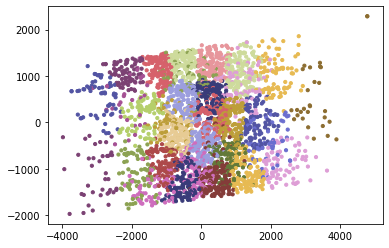

In [32]:
plt.scatter(preprocessed_data[:, 0], preprocessed_data[:, 1], c=predicted_labels, s=10, cmap='tab20b')


# decision tree grid search

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_lex, y_enc, random_state=42,
                                                     test_size=.2)

In [36]:
scaler=StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
def tree_grid(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'],
                  'random_state':[42], 'max_depth':[10, 20,50,100], 'min_samples_split':[2, 5, 10], 
                  'max_features':[30,50,60, 100, 'auto', 'log2'], }
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [39]:
tree_grid(X_train, y_train, 3)

/Users/badmin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 100,
 'min_samples_split': 10,
 'random_state': 42}

In [40]:
from io import StringIO

In [47]:
model = DecisionTreeClassifier(criterion='gini',  
                 max_depth=20, min_samples_split=10, 
                  
                 max_features=100, random_state=42, 
               )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Accuracy: %.2f" % (accuracy_score(y_test,y_pred)*100), "%")


Model Accuracy: 30.00 %


# prep data (split / scale)

In [549]:
from scipy.sparse import csr_matrix

In [550]:
'''# create sparse row to dense matrix of X data
X_csr = csr_matrix(X_ohe)
XD = X_csr.todense()'''

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_lex, y_enc, random_state=42,
                                                     test_size=.2, stratify=y_enc)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train,
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=y_train)


In [42]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)
X_test = np.asarray(X_test)

In [43]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (640,)
Train label shape: (2304,)
Validation label shape: (256,)
Test shape: (640, 258)
Train shape: (2304, 258)
Validation shape: (256, 258)


In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [46]:
#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

258


# model with label encoded target

In [94]:
def sparseCat_model():    
    regularizer = keras.regularizers.l2(0.01)
    es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=0.001)
        
    model = models.Sequential() 
    model.add(layers.Dense(369, input_dim=258, 
                           activation='relu', 
                          kernel_regularizer='l1',
                           kernel_initializer='glorot_normal'
                         
                           )) 
    #model.add(layers.Dense(300))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization(momentum=0.6))
    #model.add(layers.Dropout(0.3))
    #model.add(layers.Dense(300, activation='selu'))
    #model.add(layers.Dense(200))
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(72, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    #model.add(layers.Dense(72, activation='relu'))
    model.add(layers.Dense(32, activation="softmax"))
    
    opt = tf.keras.optimizers.Adamax()
        # Compile model
    model.compile(optimizer=opt,
                      loss=keras.losses.SparseCategoricalCrossentropy(),
                      callbacks=['es_callback'],
                      metrics=['accuracy'])
    return model

In [95]:
model1=sparseCat_model()

In [96]:
#estimator = KerasClassifier(build_fn=baseline_model, epochs=300, batch_size=64)

In [97]:
predictions1 = model1.fit(X_train,
                          y_train,
                          validation_data=(X_val, y_val),
                          
                          shuffle=True,
                          epochs=500,
                          batch_size=64)


Train on 2304 samples, validate on 256 samples
Epoch 1/500
2304/2304 [==============================] - 2s 751us/sample - loss: 40.0763 - accuracy: 0.0651 - val_loss: 33.8210 - val_accuracy: 0.1289
Epoch 2/500
2304/2304 [==============================] - 0s 161us/sample - loss: 29.4561 - accuracy: 0.1467 - val_loss: 25.3467 - val_accuracy: 0.2031
Epoch 3/500
2304/2304 [==============================] - 0s 163us/sample - loss: 22.2931 - accuracy: 0.2023 - val_loss: 19.4308 - val_accuracy: 0.2344
Epoch 4/500
2304/2304 [==============================] - 0s 162us/sample - loss: 17.3315 - accuracy: 0.2569 - val_loss: 15.3985 - val_accuracy: 0.3203
Epoch 5/500
2304/2304 [==============================] - 0s 165us/sample - loss: 13.8843 - accuracy: 0.3216 - val_loss: 12.6220 - val_accuracy: 0.3398
Epoch 6/500
2304/2304 [==============================] - 0s 163us/sample - loss: 11.5003 - accuracy: 0.3533 - val_loss: 10.6412 - val_accuracy: 0.3789
Epoch 7/500
2304/2304 [========================

2304/2304 [==============================] - 0s 194us/sample - loss: 2.1803 - accuracy: 0.6645 - val_loss: 2.9079 - val_accuracy: 0.4766
Epoch 56/500
2304/2304 [==============================] - 0s 187us/sample - loss: 2.1657 - accuracy: 0.6584 - val_loss: 2.9436 - val_accuracy: 0.5078
Epoch 57/500
2304/2304 [==============================] - 0s 197us/sample - loss: 2.1366 - accuracy: 0.6745 - val_loss: 2.9819 - val_accuracy: 0.4844
Epoch 58/500
2304/2304 [==============================] - 0s 193us/sample - loss: 2.0978 - accuracy: 0.6797 - val_loss: 2.8979 - val_accuracy: 0.5508
Epoch 59/500
2304/2304 [==============================] - 0s 195us/sample - loss: 2.0849 - accuracy: 0.6736 - val_loss: 2.8409 - val_accuracy: 0.5000
Epoch 60/500
2304/2304 [==============================] - 0s 195us/sample - loss: 2.0500 - accuracy: 0.6840 - val_loss: 2.8485 - val_accuracy: 0.5156
Epoch 61/500
2304/2304 [==============================] - 0s 197us/sample - loss: 2.0572 - accuracy: 0.6814 - val

2304/2304 [==============================] - 0s 210us/sample - loss: 1.4570 - accuracy: 0.8003 - val_loss: 2.7903 - val_accuracy: 0.5273
Epoch 110/500
2304/2304 [==============================] - 0s 205us/sample - loss: 1.4689 - accuracy: 0.7908 - val_loss: 2.8269 - val_accuracy: 0.5234
Epoch 111/500
2304/2304 [==============================] - 0s 206us/sample - loss: 1.4926 - accuracy: 0.7878 - val_loss: 2.7902 - val_accuracy: 0.5352
Epoch 112/500
2304/2304 [==============================] - 0s 204us/sample - loss: 1.5022 - accuracy: 0.7817 - val_loss: 2.8396 - val_accuracy: 0.5234
Epoch 113/500
2304/2304 [==============================] - 0s 205us/sample - loss: 1.4689 - accuracy: 0.7917 - val_loss: 2.8230 - val_accuracy: 0.5430
Epoch 114/500
2304/2304 [==============================] - 0s 204us/sample - loss: 1.4572 - accuracy: 0.7891 - val_loss: 2.7952 - val_accuracy: 0.5234
Epoch 115/500
2304/2304 [==============================] - 0s 206us/sample - loss: 1.4291 - accuracy: 0.7964

2304/2304 [==============================] - 0s 214us/sample - loss: 1.2149 - accuracy: 0.8416 - val_loss: 3.0027 - val_accuracy: 0.5156
Epoch 164/500
2304/2304 [==============================] - 0s 209us/sample - loss: 1.1879 - accuracy: 0.8524 - val_loss: 2.9360 - val_accuracy: 0.5234
Epoch 165/500
2304/2304 [==============================] - 1s 218us/sample - loss: 1.1853 - accuracy: 0.8507 - val_loss: 2.8776 - val_accuracy: 0.5508
Epoch 166/500
2304/2304 [==============================] - 0s 214us/sample - loss: 1.1973 - accuracy: 0.8451 - val_loss: 2.8567 - val_accuracy: 0.5078
Epoch 167/500
2304/2304 [==============================] - 0s 214us/sample - loss: 1.1561 - accuracy: 0.8537 - val_loss: 2.8015 - val_accuracy: 0.5078
Epoch 168/500
2304/2304 [==============================] - 0s 212us/sample - loss: 1.1383 - accuracy: 0.8598 - val_loss: 2.8416 - val_accuracy: 0.5352
Epoch 169/500
2304/2304 [==============================] - 0s 208us/sample - loss: 1.1832 - accuracy: 0.8451

2304/2304 [==============================] - 0s 210us/sample - loss: 1.0217 - accuracy: 0.8880 - val_loss: 3.0962 - val_accuracy: 0.5234
Epoch 218/500
2304/2304 [==============================] - 1s 220us/sample - loss: 1.0476 - accuracy: 0.8876 - val_loss: 3.1100 - val_accuracy: 0.5391
Epoch 219/500
2304/2304 [==============================] - 0s 214us/sample - loss: 1.1115 - accuracy: 0.8511 - val_loss: 3.1323 - val_accuracy: 0.5234
Epoch 220/500
2304/2304 [==============================] - 1s 227us/sample - loss: 1.0458 - accuracy: 0.8872 - val_loss: 3.0183 - val_accuracy: 0.5391
Epoch 221/500
2304/2304 [==============================] - 0s 215us/sample - loss: 1.0572 - accuracy: 0.8750 - val_loss: 3.1240 - val_accuracy: 0.5508
Epoch 222/500
2304/2304 [==============================] - 1s 221us/sample - loss: 1.0617 - accuracy: 0.8776 - val_loss: 3.0749 - val_accuracy: 0.5391
Epoch 223/500
2304/2304 [==============================] - 0s 216us/sample - loss: 1.0970 - accuracy: 0.8668

2304/2304 [==============================] - 0s 202us/sample - loss: 0.9833 - accuracy: 0.8885 - val_loss: 3.1304 - val_accuracy: 0.5703
Epoch 272/500
2304/2304 [==============================] - 0s 212us/sample - loss: 0.9720 - accuracy: 0.9045 - val_loss: 3.0661 - val_accuracy: 0.5312
Epoch 273/500
2304/2304 [==============================] - 0s 210us/sample - loss: 0.9379 - accuracy: 0.9089 - val_loss: 3.3525 - val_accuracy: 0.5273
Epoch 274/500
2304/2304 [==============================] - 0s 215us/sample - loss: 0.9435 - accuracy: 0.9045 - val_loss: 3.1795 - val_accuracy: 0.5508
Epoch 275/500
2304/2304 [==============================] - 0s 207us/sample - loss: 0.8918 - accuracy: 0.9128 - val_loss: 3.1473 - val_accuracy: 0.5664
Epoch 276/500
2304/2304 [==============================] - 0s 211us/sample - loss: 0.9078 - accuracy: 0.9015 - val_loss: 3.2972 - val_accuracy: 0.5391
Epoch 277/500
2304/2304 [==============================] - 0s 201us/sample - loss: 0.9061 - accuracy: 0.9049

2304/2304 [==============================] - 0s 213us/sample - loss: 0.9070 - accuracy: 0.9132 - val_loss: 3.3023 - val_accuracy: 0.5352
Epoch 326/500
2304/2304 [==============================] - 0s 209us/sample - loss: 0.8866 - accuracy: 0.9180 - val_loss: 3.2975 - val_accuracy: 0.5391
Epoch 327/500
2304/2304 [==============================] - 0s 212us/sample - loss: 0.9214 - accuracy: 0.9084 - val_loss: 3.3130 - val_accuracy: 0.5391
Epoch 328/500
2304/2304 [==============================] - 0s 198us/sample - loss: 0.8890 - accuracy: 0.9158 - val_loss: 3.1069 - val_accuracy: 0.5469
Epoch 329/500
2304/2304 [==============================] - 0s 204us/sample - loss: 0.8596 - accuracy: 0.9188 - val_loss: 3.3011 - val_accuracy: 0.5430
Epoch 330/500
2304/2304 [==============================] - 0s 202us/sample - loss: 0.8448 - accuracy: 0.9219 - val_loss: 3.1086 - val_accuracy: 0.5625
Epoch 331/500
2304/2304 [==============================] - 0s 207us/sample - loss: 0.8496 - accuracy: 0.9232

2304/2304 [==============================] - 1s 219us/sample - loss: 0.8284 - accuracy: 0.9288 - val_loss: 3.3182 - val_accuracy: 0.5312
Epoch 380/500
2304/2304 [==============================] - 1s 219us/sample - loss: 0.8719 - accuracy: 0.9136 - val_loss: 3.2144 - val_accuracy: 0.5312
Epoch 381/500
2304/2304 [==============================] - 0s 211us/sample - loss: 0.8277 - accuracy: 0.9288 - val_loss: 3.3511 - val_accuracy: 0.5391
Epoch 382/500
2304/2304 [==============================] - 1s 218us/sample - loss: 0.8187 - accuracy: 0.9258 - val_loss: 3.3513 - val_accuracy: 0.5508
Epoch 383/500
2304/2304 [==============================] - 0s 216us/sample - loss: 0.8238 - accuracy: 0.9245 - val_loss: 3.4506 - val_accuracy: 0.5508
Epoch 384/500
2304/2304 [==============================] - 1s 221us/sample - loss: 0.8497 - accuracy: 0.9271 - val_loss: 3.3805 - val_accuracy: 0.5469
Epoch 385/500
2304/2304 [==============================] - 0s 214us/sample - loss: 0.8436 - accuracy: 0.9180

2304/2304 [==============================] - 0s 216us/sample - loss: 0.8631 - accuracy: 0.9145 - val_loss: 3.5626 - val_accuracy: 0.5352
Epoch 434/500
2304/2304 [==============================] - 0s 216us/sample - loss: 0.8404 - accuracy: 0.9314 - val_loss: 3.3735 - val_accuracy: 0.5586
Epoch 435/500
2304/2304 [==============================] - 1s 222us/sample - loss: 0.8229 - accuracy: 0.9327 - val_loss: 3.3588 - val_accuracy: 0.5586
Epoch 436/500
2304/2304 [==============================] - 1s 218us/sample - loss: 0.7930 - accuracy: 0.9306 - val_loss: 3.3193 - val_accuracy: 0.5469
Epoch 437/500
2304/2304 [==============================] - 0s 212us/sample - loss: 0.8120 - accuracy: 0.9301 - val_loss: 3.5343 - val_accuracy: 0.5273
Epoch 438/500
2304/2304 [==============================] - 1s 218us/sample - loss: 0.8262 - accuracy: 0.9310 - val_loss: 3.3768 - val_accuracy: 0.5195
Epoch 439/500
2304/2304 [==============================] - 0s 206us/sample - loss: 0.8352 - accuracy: 0.9275

2304/2304 [==============================] - 1s 218us/sample - loss: 0.7746 - accuracy: 0.9362 - val_loss: 3.5413 - val_accuracy: 0.5352
Epoch 488/500
2304/2304 [==============================] - 0s 205us/sample - loss: 0.7816 - accuracy: 0.9336 - val_loss: 3.5823 - val_accuracy: 0.5195
Epoch 489/500
2304/2304 [==============================] - 1s 219us/sample - loss: 0.7606 - accuracy: 0.9366 - val_loss: 3.5053 - val_accuracy: 0.5508
Epoch 490/500
2304/2304 [==============================] - 0s 210us/sample - loss: 0.7572 - accuracy: 0.9397 - val_loss: 3.4596 - val_accuracy: 0.5352
Epoch 491/500
2304/2304 [==============================] - 1s 222us/sample - loss: 0.7569 - accuracy: 0.9410 - val_loss: 3.4993 - val_accuracy: 0.5391
Epoch 492/500
2304/2304 [==============================] - 0s 210us/sample - loss: 0.7573 - accuracy: 0.9401 - val_loss: 3.5501 - val_accuracy: 0.5391
Epoch 493/500
2304/2304 [==============================] - 0s 213us/sample - loss: 0.7651 - accuracy: 0.9340

In [98]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 369)               95571     
_________________________________________________________________
dense_44 (Dense)             (None, 256)               94720     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_46 (Dense)             (None, 72)                9288      
_________________________________________________________________
dense_47 (Dense)             (None, 64)               

In [99]:
mod1_dict = predictions1.history
mod1_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [100]:
model_results(model1)

2304/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training: [0.5805762161811193, 0.9965278]
640/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test: [3.2516635775566103, 0.5671875]


In [101]:
def plot_history(x):
    pd.DataFrame(x.history).plot(figsize=(12,9))
    plt.grid(True)
    plt.title('Training/Validation Loss/Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

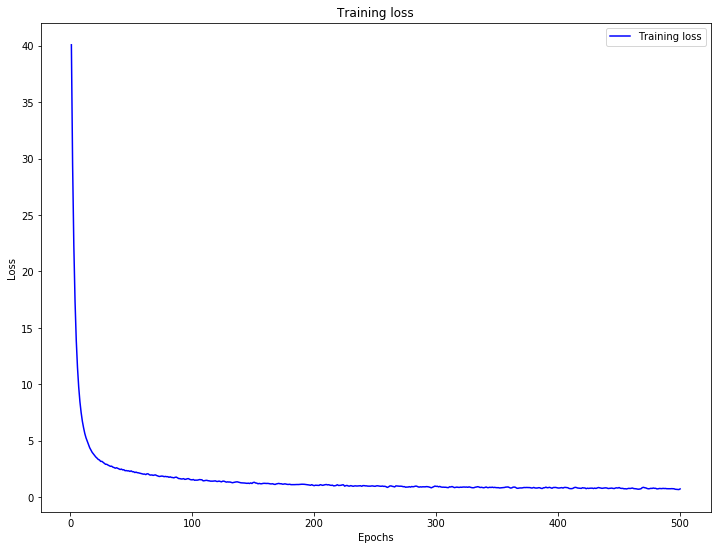

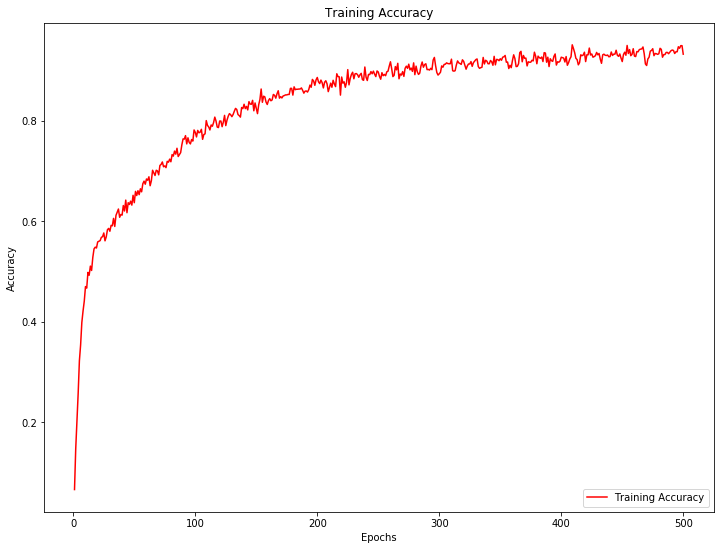

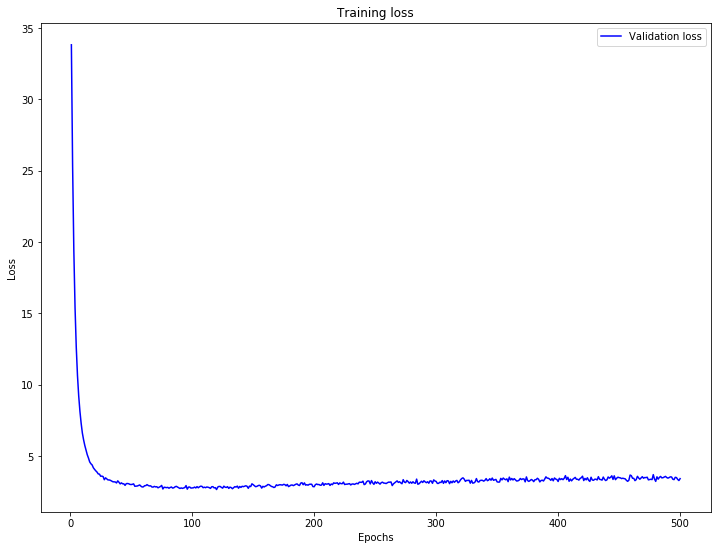

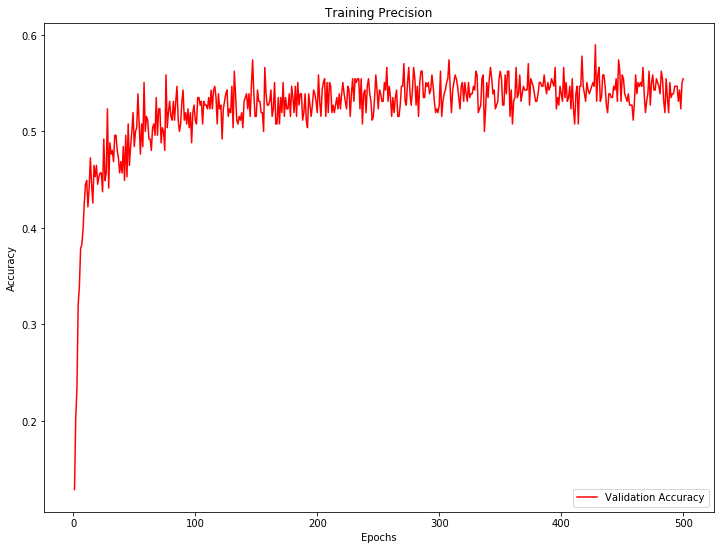

In [102]:
acc_plot(mod1_dict)

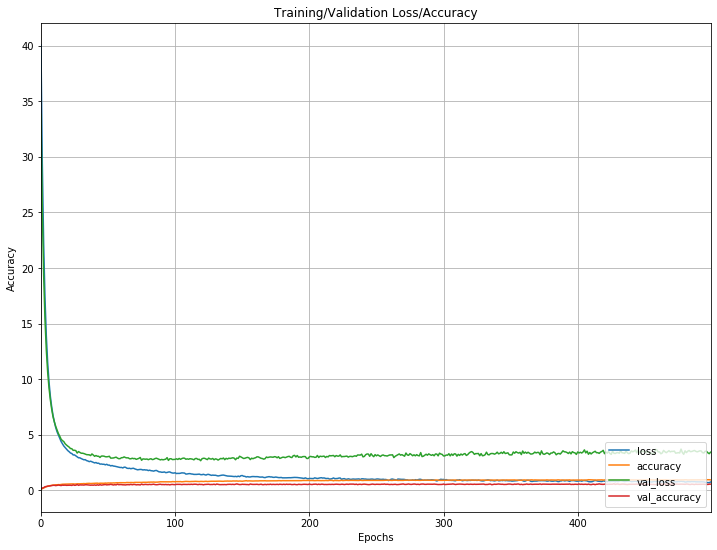

In [103]:
plot_history(predictions1)

In [104]:
weights, biases = model1.layers[0].get_weights()

print('Weights:\n', weights)
print()
print('Biases:\n', biases)

Weights:
 [[-2.57082866e-06  1.23135076e-04 -1.94670213e-03 ...  7.31824039e-05
   2.40751397e-04 -8.34126724e-04]
 [-1.31006091e-05 -1.22051948e-04 -5.20724803e-04 ... -5.44334907e-05
   1.33317139e-04  2.63586864e-02]
 [ 4.34142421e-05 -2.49872101e-04 -3.47248540e-04 ... -6.47816705e-07
  -1.07257583e-04  3.13220136e-02]
 ...
 [ 2.47351883e-04  1.00794605e-04 -3.72643772e-05 ...  7.82409697e-05
  -4.92552754e-05 -6.46583736e-04]
 [ 1.19022028e-04  2.71862100e-05 -1.29647516e-02 ...  3.83366278e-05
  -4.79961018e-05 -2.82993802e-04]
 [-1.27200430e-04 -3.68840047e-05 -3.23846849e-04 ...  7.67927122e-05
  -6.79561999e-05 -8.53741309e-04]]

Biases:
 [-0.03579474 -0.04102473 -0.01113122 -0.02055381 -0.02630644 -0.05050508
 -0.03134942 -0.02816559 -0.05356197 -0.03561266  0.00165003 -0.01474875
 -0.02950619 -0.02850913 -0.03163124 -0.03875954 -0.0356159  -0.04012437
 -0.04381386 -0.04250136 -0.03703908 -0.03557514  0.00499654 -0.03641655
 -0.03247472 -0.03449906  0.00133061 -0.04438867 -0.

In [105]:
loss_and_metrics = model1.evaluate(X_test, y_test)

loss_and_metrics

640/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[3.2516635775566103, 0.5671875]

In [106]:
classes = model1.predict(X_test)

classes

array([[5.05645236e-04, 6.61430008e-11, 1.44791654e-08, ...,
        1.16616876e-08, 3.13381835e-13, 1.20019756e-01],
       [2.89005755e-12, 5.03575859e-13, 4.26458458e-20, ...,
        1.49530410e-06, 7.10090112e-11, 5.56331825e-09],
       [2.52023765e-05, 1.46214571e-03, 6.03269032e-11, ...,
        4.25499636e-09, 3.97314921e-07, 3.09088699e-10],
       ...,
       [3.01395887e-11, 1.40018622e-11, 7.84728727e-14, ...,
        1.37705250e-13, 6.21012248e-13, 2.73350370e-16],
       [2.36710948e-05, 3.75163791e-06, 1.09426735e-03, ...,
        9.89088395e-11, 3.24709908e-05, 4.07875157e-11],
       [2.70189776e-04, 3.23035124e-06, 4.03359354e-06, ...,
        1.24372181e-03, 1.42114480e-08, 5.83670009e-03]], dtype=float32)

In [107]:
predictions = np.argmax(classes, axis=1)

predictions

array([27, 17,  3, 27,  6,  4, 13, 31,  8, 28, 14,  1,  5, 14,  0, 27, 30,
        2,  6, 25,  2,  6, 11, 15, 24, 18, 12,  7, 19,  0, 12, 30, 29, 29,
       13, 28, 19, 27, 16,  3, 18, 16, 23, 14,  1, 17, 15, 24, 19,  9,  6,
        4,  9, 16, 23, 24,  8, 10, 31, 10, 23, 10, 14, 31, 18, 11, 15, 10,
       30,  1, 26, 26, 12, 11,  8, 23,  5, 16, 20, 28, 11,  2, 24, 13, 16,
       16, 24, 24,  7,  2, 14, 14, 21, 17,  3, 23,  9, 15,  0, 10, 30, 31,
       26, 29,  0,  3, 28,  8,  5, 26, 26,  1, 28,  7, 14,  0,  8,  3, 31,
       16, 19,  9, 20,  7,  2, 26, 18,  6,  3,  0, 21, 12, 30,  5, 11,  4,
       28, 24, 14, 18, 22,  2,  5,  5, 22, 12, 31, 31, 12, 19, 11, 31, 19,
       26, 23, 30, 25, 17, 10,  4, 28, 17, 21,  2, 13,  3,  2, 17,  7, 24,
       18, 12, 21,  9, 10, 31, 22, 25, 26,  7, 15,  8, 29, 10, 17, 28,  7,
       30, 22,  1,  3,  1, 30, 29, 27, 26,  6, 10, 10,  4,  8, 23, 20,  8,
       19, 20, 10, 21, 27, 23, 19, 13,  4, 22, 15,  2, 21, 29, 11, 15, 22,
       10, 22,  6, 22, 28

In [108]:
# predict probabilities for test set
yhat_probs = model1.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1.predict_classes(X_test, verbose=0)



In [109]:
# assess metrics of model
get_metrics(y_test, yhat_classes, yhat_probs)

Accuracy: 0.567187
Precision: 0.567187
Recall: 0.567187
F1 score: 0.567187
[[ 9  0  1 ...  0  1  0]
 [ 0 14  0 ...  0  0  0]
 [ 1  0 11 ...  0  1  0]
 ...
 [ 0  1  0 ... 16  0  0]
 [ 1  0  1 ...  1 10  0]
 [ 0  0  0 ...  0  0 16]]


In [ ]:
np.sum(predictions  == np.argmax(y_test)) / predictions.shape

# model 2

In [110]:
def sparseCat_model2():    
    
    es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=0.001)
        
    model = models.Sequential() 
    model.add(layers.Dense(200, input_dim=258, 
                           activation='relu', 
                          kernel_regularizer='l1',
                           kernel_initializer='glorot_normal'
                         
                           )) 

    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    
    model.add(layers.Dense(32, activation="softmax"))
    
    opt = tf.keras.optimizers.Adamax()
        # Compile model
    model.compile(optimizer=opt,
                      loss=keras.losses.SparseCategoricalCrossentropy(),
                      callbacks=['es_callback'],
                      metrics=['accuracy'])
    return model

In [111]:
model2=sparseCat_model2()

In [112]:
predictions2 = model2.fit(X_train,
                          y_train,
                          validation_data=(X_val, y_val),
                          
                          shuffle=True,
                          epochs=350,
                          batch_size=64)


Train on 2304 samples, validate on 256 samples
Epoch 1/350
2304/2304 [==============================] - 1s 390us/sample - loss: 25.7575 - accuracy: 0.1345 - val_loss: 20.8283 - val_accuracy: 0.2227
Epoch 2/350
2304/2304 [==============================] - 0s 105us/sample - loss: 17.3461 - accuracy: 0.2630 - val_loss: 14.2697 - val_accuracy: 0.2578
Epoch 3/350
2304/2304 [==============================] - 0s 99us/sample - loss: 11.9831 - accuracy: 0.3394 - val_loss: 10.0725 - val_accuracy: 0.3008
Epoch 4/350
2304/2304 [==============================] - 0s 100us/sample - loss: 8.6024 - accuracy: 0.3516 - val_loss: 7.4516 - val_accuracy: 0.3242
Epoch 5/350
2304/2304 [==============================] - 0s 101us/sample - loss: 6.4792 - accuracy: 0.3767 - val_loss: 5.8044 - val_accuracy: 0.3281
Epoch 6/350
2304/2304 [==============================] - 0s 107us/sample - loss: 5.1301 - accuracy: 0.3954 - val_loss: 4.7435 - val_accuracy: 0.3594
Epoch 7/350
2304/2304 [==============================]

2304/2304 [==============================] - 0s 125us/sample - loss: 1.7777 - accuracy: 0.6241 - val_loss: 2.2753 - val_accuracy: 0.4961
Epoch 56/350
2304/2304 [==============================] - 0s 156us/sample - loss: 1.7370 - accuracy: 0.6350 - val_loss: 2.2516 - val_accuracy: 0.4766
Epoch 57/350
2304/2304 [==============================] - 0s 151us/sample - loss: 1.7171 - accuracy: 0.6380 - val_loss: 2.2549 - val_accuracy: 0.4961
Epoch 58/350
2304/2304 [==============================] - 0s 142us/sample - loss: 1.7346 - accuracy: 0.6380 - val_loss: 2.2816 - val_accuracy: 0.4883
Epoch 59/350
2304/2304 [==============================] - 0s 128us/sample - loss: 1.7068 - accuracy: 0.6441 - val_loss: 2.2636 - val_accuracy: 0.4805
Epoch 60/350
2304/2304 [==============================] - 0s 101us/sample - loss: 1.7128 - accuracy: 0.6380 - val_loss: 2.2522 - val_accuracy: 0.4922
Epoch 61/350
2304/2304 [==============================] - 0s 97us/sample - loss: 1.6901 - accuracy: 0.6432 - val_

Epoch 110/350
2304/2304 [==============================] - 0s 109us/sample - loss: 1.3694 - accuracy: 0.7391 - val_loss: 2.3297 - val_accuracy: 0.4844
Epoch 111/350
2304/2304 [==============================] - 0s 101us/sample - loss: 1.3549 - accuracy: 0.7500 - val_loss: 2.3436 - val_accuracy: 0.5234
Epoch 112/350
2304/2304 [==============================] - 0s 101us/sample - loss: 1.3441 - accuracy: 0.7565 - val_loss: 2.3298 - val_accuracy: 0.5195
Epoch 113/350
2304/2304 [==============================] - 0s 103us/sample - loss: 1.3300 - accuracy: 0.7496 - val_loss: 2.3357 - val_accuracy: 0.5352
Epoch 114/350
2304/2304 [==============================] - 0s 103us/sample - loss: 1.3262 - accuracy: 0.7578 - val_loss: 2.3483 - val_accuracy: 0.5117
Epoch 115/350
2304/2304 [==============================] - 0s 102us/sample - loss: 1.3208 - accuracy: 0.7535 - val_loss: 2.3674 - val_accuracy: 0.5078
Epoch 116/350
2304/2304 [==============================] - 0s 103us/sample - loss: 1.3331 - ac

2304/2304 [==============================] - 0s 129us/sample - loss: 1.0735 - accuracy: 0.8299 - val_loss: 2.4992 - val_accuracy: 0.5195
Epoch 165/350
2304/2304 [==============================] - 0s 133us/sample - loss: 1.0613 - accuracy: 0.8442 - val_loss: 2.4422 - val_accuracy: 0.4961
Epoch 166/350
2304/2304 [==============================] - 0s 138us/sample - loss: 1.0659 - accuracy: 0.8368 - val_loss: 2.3929 - val_accuracy: 0.5000
Epoch 167/350
2304/2304 [==============================] - 0s 130us/sample - loss: 1.0559 - accuracy: 0.8485 - val_loss: 2.4592 - val_accuracy: 0.5234
Epoch 168/350
2304/2304 [==============================] - 0s 133us/sample - loss: 1.0633 - accuracy: 0.8351 - val_loss: 2.4548 - val_accuracy: 0.5117
Epoch 169/350
2304/2304 [==============================] - 0s 138us/sample - loss: 1.0471 - accuracy: 0.8420 - val_loss: 2.3939 - val_accuracy: 0.5273
Epoch 170/350
2304/2304 [==============================] - 0s 133us/sample - loss: 1.0498 - accuracy: 0.8438

2304/2304 [==============================] - 0s 134us/sample - loss: 0.8690 - accuracy: 0.9023 - val_loss: 2.6174 - val_accuracy: 0.5195
Epoch 219/350
2304/2304 [==============================] - 0s 131us/sample - loss: 0.8584 - accuracy: 0.8993 - val_loss: 2.5798 - val_accuracy: 0.5273
Epoch 220/350
2304/2304 [==============================] - 0s 131us/sample - loss: 0.8615 - accuracy: 0.9015 - val_loss: 2.7232 - val_accuracy: 0.4688
Epoch 221/350
2304/2304 [==============================] - 0s 131us/sample - loss: 0.8701 - accuracy: 0.8989 - val_loss: 2.6523 - val_accuracy: 0.5312
Epoch 222/350
2304/2304 [==============================] - 0s 131us/sample - loss: 0.8566 - accuracy: 0.8963 - val_loss: 2.6081 - val_accuracy: 0.5078
Epoch 223/350
2304/2304 [==============================] - 0s 135us/sample - loss: 0.8571 - accuracy: 0.8989 - val_loss: 2.5766 - val_accuracy: 0.5430
Epoch 224/350
2304/2304 [==============================] - 0s 137us/sample - loss: 0.8474 - accuracy: 0.9032

2304/2304 [==============================] - 0s 134us/sample - loss: 0.6980 - accuracy: 0.9475 - val_loss: 2.7708 - val_accuracy: 0.5156
Epoch 273/350
2304/2304 [==============================] - 0s 135us/sample - loss: 0.7065 - accuracy: 0.9484 - val_loss: 2.7788 - val_accuracy: 0.5078
Epoch 274/350
2304/2304 [==============================] - 0s 136us/sample - loss: 0.6836 - accuracy: 0.9523 - val_loss: 2.7977 - val_accuracy: 0.5078
Epoch 275/350
2304/2304 [==============================] - 0s 131us/sample - loss: 0.7263 - accuracy: 0.9306 - val_loss: 2.7235 - val_accuracy: 0.5117
Epoch 276/350
2304/2304 [==============================] - 0s 133us/sample - loss: 0.7295 - accuracy: 0.9353 - val_loss: 2.9272 - val_accuracy: 0.5039
Epoch 277/350
2304/2304 [==============================] - 0s 137us/sample - loss: 0.7254 - accuracy: 0.9440 - val_loss: 2.8743 - val_accuracy: 0.5156
Epoch 278/350
2304/2304 [==============================] - 0s 133us/sample - loss: 0.7024 - accuracy: 0.9462

2304/2304 [==============================] - 0s 194us/sample - loss: 0.6048 - accuracy: 0.9622 - val_loss: 2.9314 - val_accuracy: 0.5195
Epoch 327/350
2304/2304 [==============================] - 0s 188us/sample - loss: 0.6448 - accuracy: 0.9518 - val_loss: 2.9686 - val_accuracy: 0.5078
Epoch 328/350
2304/2304 [==============================] - 0s 162us/sample - loss: 0.6127 - accuracy: 0.9670 - val_loss: 2.8818 - val_accuracy: 0.5352
Epoch 329/350
2304/2304 [==============================] - 0s 152us/sample - loss: 0.5863 - accuracy: 0.9735 - val_loss: 2.8735 - val_accuracy: 0.5078
Epoch 330/350
2304/2304 [==============================] - 0s 139us/sample - loss: 0.5702 - accuracy: 0.9770 - val_loss: 2.9484 - val_accuracy: 0.5352
Epoch 331/350
2304/2304 [==============================] - 0s 132us/sample - loss: 0.5868 - accuracy: 0.9722 - val_loss: 2.8725 - val_accuracy: 0.5117
Epoch 332/350
2304/2304 [==============================] - 0s 133us/sample - loss: 0.5735 - accuracy: 0.9774

In [113]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 200)               51800     
_________________________________________________________________
dense_50 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_51 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_52 (Dense)             (None, 32)                6432      
Total params: 138,632
Trainable params: 138,632
Non-trainable params: 0
_________________________________________________________________


In [114]:
mod2_dict = predictions2.history
mod2_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [115]:
model_results(model2)

2304/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training: [0.5482027799718909, 0.98480904]
640/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test: [2.949925738573074, 0.5390625]


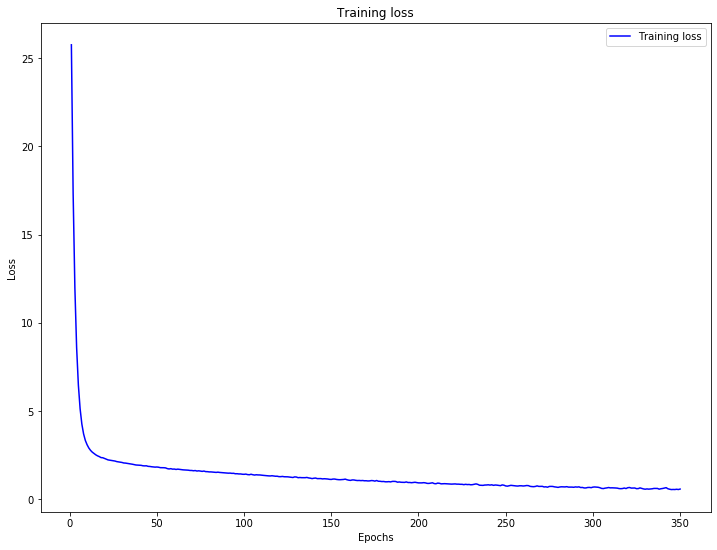

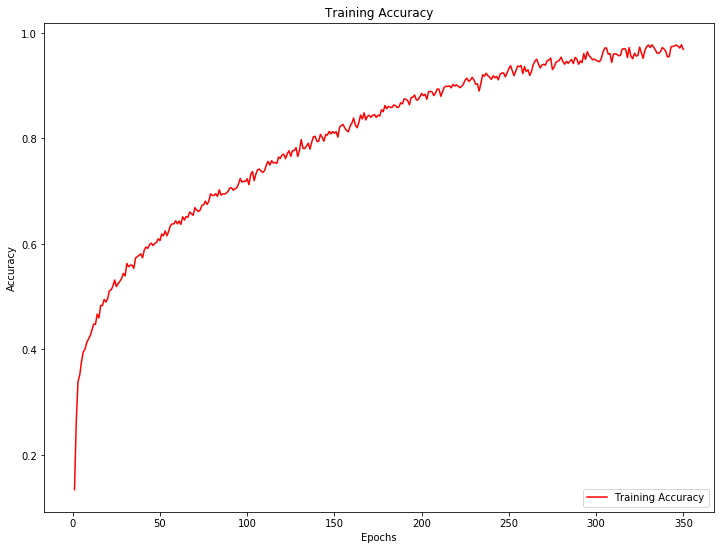

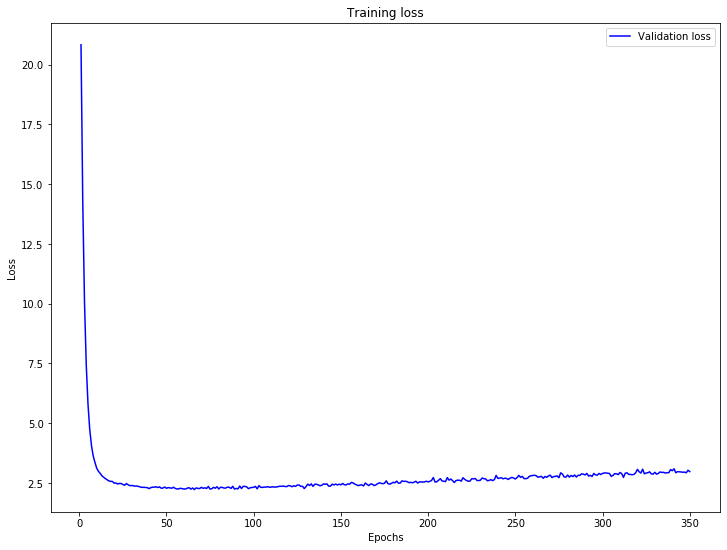

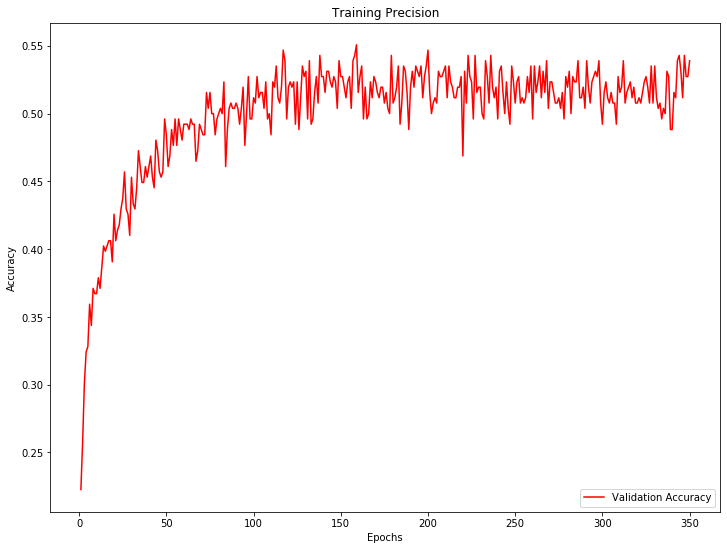

In [117]:
acc_plot(mod2_dict)

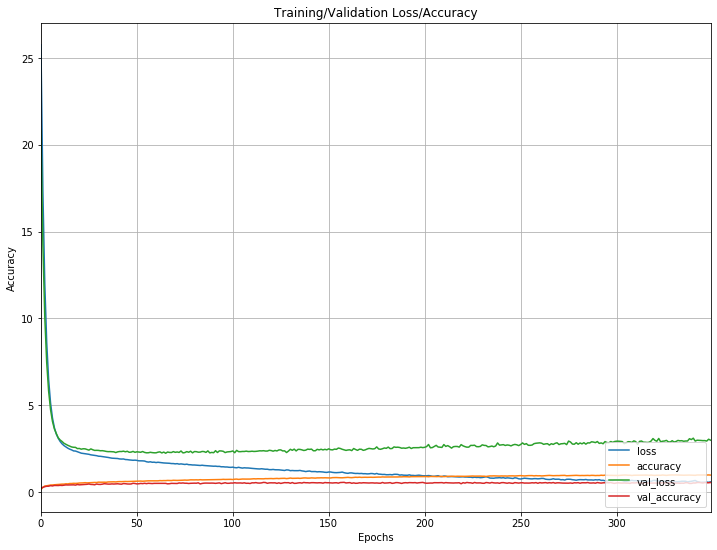

In [118]:
plot_history(predictions2)

In [119]:
weights, biases = model2.layers[0].get_weights()

print('Weights:\n', weights)
print()
print('Biases:\n', biases)

Weights:
 [[ 1.03240163e-04 -4.40887903e-04 -1.20172896e-04 ... -1.59015995e-04
  -5.44249197e-04  8.41464862e-06]
 [ 2.27398370e-04 -4.77971946e-04 -3.36480189e-05 ... -1.51709275e-04
  -4.18068026e-04  2.25356416e-06]
 [ 3.94652947e-04 -6.10666291e-04  3.60607009e-06 ... -2.24698542e-05
  -6.62304286e-04  1.19425968e-05]
 ...
 [-4.17876217e-05  2.72488716e-04  5.71302480e-05 ...  2.76692153e-04
  -1.76182730e-04 -5.96901373e-05]
 [-6.43683074e-04  3.19951272e-04 -1.76978196e-04 ... -5.49275501e-05
  -3.17492813e-04  1.83549768e-04]
 [-3.89400549e-04  6.08166214e-04  5.02824041e-05 ...  1.93547778e-04
  -3.56080622e-04 -2.31205602e-04]]

Biases:
 [ 0.0338274   0.17760313 -0.0060462   0.00295308  0.0163184  -0.00365676
  0.11705761  0.09439974  0.0301009  -0.0159575   0.01068855  0.14628987
  0.04261244  0.09670316  0.11789301 -0.00593253  0.07886684  0.11879899
  0.15532489  0.07936821  0.05063557 -0.00961988  0.1852539   0.07890045
  0.00726151  0.07056169  0.20482503  0.14895965  0.

In [120]:
loss_and_metrics = model2.evaluate(X_test, y_test)

loss_and_metrics

640/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.949925738573074, 0.5390625]

In [121]:
classes = model2.predict(X_test)

classes

array([[1.92664936e-03, 6.50055584e-13, 9.89611726e-11, ...,
        5.49056978e-09, 4.80589300e-15, 5.03588235e-04],
       [4.30950209e-09, 2.94220037e-10, 4.25090084e-29, ...,
        1.83091342e-05, 1.40212945e-11, 1.82505175e-06],
       [2.97254957e-07, 3.41272703e-03, 3.78336756e-28, ...,
        1.44073491e-08, 6.34904421e-11, 1.12153451e-15],
       ...,
       [5.92240146e-10, 4.00132876e-06, 4.08356687e-22, ...,
        3.70382103e-09, 1.83401061e-09, 3.00898006e-13],
       [1.63636793e-09, 5.42261077e-05, 4.61657601e-09, ...,
        8.69417940e-11, 2.53428129e-06, 1.15596442e-10],
       [1.46579836e-02, 3.14075476e-03, 3.20937033e-05, ...,
        3.20473664e-05, 5.10562269e-04, 2.87534029e-04]], dtype=float32)

In [122]:
predictions = np.argmax(classes, axis=1)

predictions

array([27, 17, 22, 27, 31,  4, 11, 31,  8, 28,  4,  1,  5, 19,  0,  7, 13,
        7,  6,  0, 13,  6,  9, 22, 24, 18, 12,  7, 19,  0, 12, 30, 29, 29,
       19, 28, 19, 18, 16,  3,  4, 16, 23, 28,  1, 22,  4, 24, 19, 14,  6,
        4,  9, 16, 23,  9,  8, 10,  2, 10, 23, 10, 14, 31,  0,  0,  4, 10,
       30,  5, 26, 26, 12, 11, 13, 23,  2, 16, 20, 27,  9, 19, 24, 13, 16,
       16, 24, 24,  7,  2, 22, 14, 21, 17,  3,  9,  3, 15, 28, 19,  9, 31,
        7, 29, 15,  3, 28,  8,  5, 26,  0, 24, 28,  7, 22,  8,  6,  3, 31,
       16, 19,  9, 20,  7, 12,  7, 20,  6,  3,  0, 20, 11, 13,  5, 10,  4,
       28,  1, 16,  8,  1, 14,  1,  5, 22,  4,  7, 17, 12, 19, 11, 14, 19,
        0, 23, 14, 29, 14, 10,  4, 28, 17, 21,  2, 13,  3, 23, 17,  7, 24,
        8, 12,  8,  9, 23, 31, 22, 25, 22,  4, 15, 21, 29,  9, 24, 28,  9,
       30, 30,  1,  6,  1, 13, 29, 11, 26, 17, 11, 10,  6, 13,  2, 29,  8,
        0, 20, 30, 21, 25, 23, 19, 13, 11,  0, 20,  2, 15, 29, 11, 15, 22,
       23, 22,  6, 13, 28

In [123]:
# predict probabilities for test set
yhat_probs = model2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model2.predict_classes(X_test, verbose=0)



In [124]:
# assess metrics of model
get_metrics(y_test, yhat_classes, yhat_probs)

Accuracy: 0.539062
Precision: 0.539062
Recall: 0.539062
F1 score: 0.539062
[[ 7  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 1  0 11 ...  0  0  0]
 ...
 [ 0  1  0 ... 16  0  0]
 [ 1  0  0 ...  1  8  0]
 [ 0  0  0 ...  0  0 13]]


# one hot encoded target

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_lex, dummy_y, random_state=42,
                                                     test_size=.2, stratify=dummy_y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train,
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=y_train)


In [126]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)
X_test = np.asarray(X_test)

In [127]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (640, 32)
Train label shape: (2304, 32)
Validation label shape: (256, 32)
Test shape: (640, 258)
Train shape: (2304, 258)
Validation shape: (256, 258)


In [128]:
scaler = StandardScaler()

In [129]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [130]:
#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

258


In [164]:
def catCross_model():    
    regularizer = keras.regularizers.l2(0.01)
    es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=7)
        
    model = models.Sequential() 
    model.add(layers.Dense(300, input_dim=258, kernel_regularizer='l1',
                           activation='relu', bias_initializer='glorot_normal' )) 
 
    #model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.BatchNormalization(momentum=0.6))  
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(96, activation='relu'))
   # model.add(layers.Dense(72, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation="softmax"))
    
    opt = tf.keras.optimizers.Adamax()
        # Compile model
    model.compile(optimizer=opt,
                      loss=keras.losses.CategoricalCrossentropy(),
                      callbacks=['es_callback'],
                      metrics=['accuracy'])
    return model

In [165]:
model3=catCross_model()

In [166]:
predictions3 = model3.fit(X_train,
                          y_train,
                          validation_data=(X_val, y_val),
                          
                          shuffle=True,
                          epochs=350,
                          batch_size=10)

Train on 2304 samples, validate on 256 samples
Epoch 1/350
2304/2304 [==============================] - 3s 1ms/sample - loss: 27.8283 - accuracy: 0.1311 - val_loss: 18.8296 - val_accuracy: 0.2305
Epoch 2/350
2304/2304 [==============================] - 1s 607us/sample - loss: 14.4021 - accuracy: 0.2999 - val_loss: 11.3341 - val_accuracy: 0.3594
Epoch 3/350
2304/2304 [==============================] - 1s 605us/sample - loss: 9.3195 - accuracy: 0.3993 - val_loss: 7.9654 - val_accuracy: 0.4219
Epoch 4/350
2304/2304 [==============================] - 1s 644us/sample - loss: 6.9071 - accuracy: 0.4579 - val_loss: 6.3582 - val_accuracy: 0.4453
Epoch 5/350
2304/2304 [==============================] - 2s 721us/sample - loss: 5.5998 - accuracy: 0.4748 - val_loss: 5.6127 - val_accuracy: 0.4141
Epoch 6/350
2304/2304 [==============================] - 1s 631us/sample - loss: 4.7615 - accuracy: 0.4931 - val_loss: 4.8713 - val_accuracy: 0.3906
Epoch 7/350
2304/2304 [==============================] - 

2304/2304 [==============================] - 2s 774us/sample - loss: 1.4465 - accuracy: 0.8138 - val_loss: 2.7579 - val_accuracy: 0.5430
Epoch 56/350
2304/2304 [==============================] - 2s 681us/sample - loss: 1.4502 - accuracy: 0.8125 - val_loss: 3.1510 - val_accuracy: 0.5195
Epoch 57/350
2304/2304 [==============================] - 2s 654us/sample - loss: 1.3585 - accuracy: 0.8294 - val_loss: 2.9212 - val_accuracy: 0.5547
Epoch 58/350
2304/2304 [==============================] - 1s 640us/sample - loss: 1.4081 - accuracy: 0.8186 - val_loss: 3.1382 - val_accuracy: 0.5078
Epoch 59/350
2304/2304 [==============================] - 1s 643us/sample - loss: 1.4261 - accuracy: 0.8225 - val_loss: 2.9325 - val_accuracy: 0.5664
Epoch 60/350
2304/2304 [==============================] - 1s 636us/sample - loss: 1.3681 - accuracy: 0.8333 - val_loss: 2.8561 - val_accuracy: 0.5547
Epoch 61/350
2304/2304 [==============================] - 1s 643us/sample - loss: 1.3510 - accuracy: 0.8290 - val

2304/2304 [==============================] - 2s 669us/sample - loss: 0.9389 - accuracy: 0.9297 - val_loss: 3.3530 - val_accuracy: 0.5859
Epoch 110/350
2304/2304 [==============================] - 1s 634us/sample - loss: 1.0357 - accuracy: 0.8980 - val_loss: 3.6662 - val_accuracy: 0.5352
Epoch 111/350
2304/2304 [==============================] - 1s 632us/sample - loss: 0.9264 - accuracy: 0.9271 - val_loss: 3.4188 - val_accuracy: 0.5547
Epoch 112/350
2304/2304 [==============================] - 1s 640us/sample - loss: 0.9971 - accuracy: 0.9106 - val_loss: 3.5100 - val_accuracy: 0.5625
Epoch 113/350
2304/2304 [==============================] - 1s 629us/sample - loss: 0.9702 - accuracy: 0.9149 - val_loss: 3.2431 - val_accuracy: 0.5859
Epoch 114/350
2304/2304 [==============================] - 1s 632us/sample - loss: 0.9117 - accuracy: 0.9262 - val_loss: 3.2855 - val_accuracy: 0.5664
Epoch 115/350
2304/2304 [==============================] - 1s 629us/sample - loss: 0.9055 - accuracy: 0.9253

2304/2304 [==============================] - 1s 600us/sample - loss: 0.8441 - accuracy: 0.9271 - val_loss: 4.0260 - val_accuracy: 0.5312
Epoch 164/350
2304/2304 [==============================] - 1s 602us/sample - loss: 0.8315 - accuracy: 0.9327 - val_loss: 3.8103 - val_accuracy: 0.5273
Epoch 165/350
2304/2304 [==============================] - 1s 601us/sample - loss: 0.7832 - accuracy: 0.9518 - val_loss: 3.7385 - val_accuracy: 0.5352
Epoch 166/350
2304/2304 [==============================] - 1s 605us/sample - loss: 0.7857 - accuracy: 0.9375 - val_loss: 3.4559 - val_accuracy: 0.5547
Epoch 167/350
2304/2304 [==============================] - 1s 604us/sample - loss: 0.8240 - accuracy: 0.9457 - val_loss: 3.8929 - val_accuracy: 0.5391
Epoch 168/350
2304/2304 [==============================] - 1s 610us/sample - loss: 0.7797 - accuracy: 0.9501 - val_loss: 3.6490 - val_accuracy: 0.5781
Epoch 169/350
2304/2304 [==============================] - 1s 633us/sample - loss: 0.7833 - accuracy: 0.9457

2304/2304 [==============================] - 1s 627us/sample - loss: 0.6498 - accuracy: 0.9701 - val_loss: 3.9597 - val_accuracy: 0.5195
Epoch 218/350
2304/2304 [==============================] - 1s 619us/sample - loss: 0.7356 - accuracy: 0.9497 - val_loss: 4.2277 - val_accuracy: 0.5195
Epoch 219/350
2304/2304 [==============================] - 1s 624us/sample - loss: 0.7522 - accuracy: 0.9462 - val_loss: 4.2521 - val_accuracy: 0.5273
Epoch 220/350
2304/2304 [==============================] - 1s 620us/sample - loss: 0.7060 - accuracy: 0.9618 - val_loss: 4.1027 - val_accuracy: 0.5273
Epoch 221/350
2304/2304 [==============================] - 1s 623us/sample - loss: 0.7075 - accuracy: 0.9540 - val_loss: 3.8217 - val_accuracy: 0.5273
Epoch 222/350
2304/2304 [==============================] - 1s 622us/sample - loss: 0.7206 - accuracy: 0.9549 - val_loss: 3.9556 - val_accuracy: 0.5625
Epoch 223/350
2304/2304 [==============================] - 1s 622us/sample - loss: 0.6500 - accuracy: 0.9679

2304/2304 [==============================] - 2s 879us/sample - loss: 0.7647 - accuracy: 0.9371 - val_loss: 4.0667 - val_accuracy: 0.5352
Epoch 272/350
2304/2304 [==============================] - 2s 706us/sample - loss: 0.7026 - accuracy: 0.9635 - val_loss: 3.9758 - val_accuracy: 0.5664
Epoch 273/350
2304/2304 [==============================] - 2s 693us/sample - loss: 0.5828 - accuracy: 0.9770 - val_loss: 4.0748 - val_accuracy: 0.5859
Epoch 274/350
2304/2304 [==============================] - 2s 704us/sample - loss: 0.6362 - accuracy: 0.9631 - val_loss: 3.8225 - val_accuracy: 0.5586
Epoch 275/350
2304/2304 [==============================] - 2s 699us/sample - loss: 0.6091 - accuracy: 0.9653 - val_loss: 4.4715 - val_accuracy: 0.5156
Epoch 276/350
2304/2304 [==============================] - 2s 694us/sample - loss: 0.7317 - accuracy: 0.9431 - val_loss: 4.1001 - val_accuracy: 0.5391
Epoch 277/350
2304/2304 [==============================] - 2s 698us/sample - loss: 0.6692 - accuracy: 0.9679

2304/2304 [==============================] - 1s 619us/sample - loss: 0.5687 - accuracy: 0.9779 - val_loss: 4.2046 - val_accuracy: 0.5469
Epoch 326/350
2304/2304 [==============================] - 1s 607us/sample - loss: 0.5871 - accuracy: 0.9670 - val_loss: 4.1561 - val_accuracy: 0.5273
Epoch 327/350
2304/2304 [==============================] - 1s 633us/sample - loss: 0.7687 - accuracy: 0.9405 - val_loss: 4.2537 - val_accuracy: 0.5625
Epoch 328/350
2304/2304 [==============================] - 1s 602us/sample - loss: 0.5684 - accuracy: 0.9839 - val_loss: 4.4381 - val_accuracy: 0.5547
Epoch 329/350
2304/2304 [==============================] - 1s 595us/sample - loss: 0.5395 - accuracy: 0.9770 - val_loss: 4.1999 - val_accuracy: 0.5430
Epoch 330/350
2304/2304 [==============================] - 1s 597us/sample - loss: 0.5323 - accuracy: 0.9813 - val_loss: 4.2909 - val_accuracy: 0.5742
Epoch 331/350
2304/2304 [==============================] - 1s 594us/sample - loss: 0.5465 - accuracy: 0.9779

In [155]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 300)               77700     
_________________________________________________________________
dense_64 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_66 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                2080      
Total params: 166,544
Trainable params: 166,544
Non-trainable params: 0
_________________________________________________________________


In [156]:
mod3_dict = predictions3.history
mod3_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [157]:
model_results(model3)

2304/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training: [0.5298157636490133, 0.95963544]
640/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test: [4.250071120262146, 0.5109375]


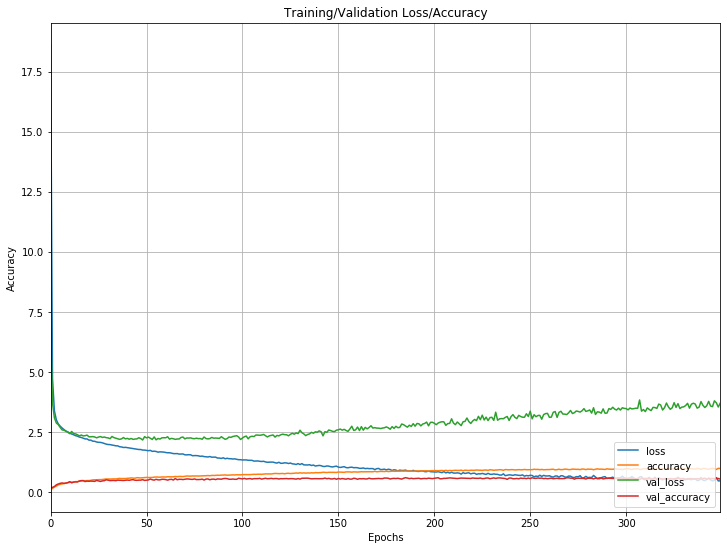

In [158]:
plot_history(predictions3)

In [159]:
weights, biases = model3.layers[0].get_weights()

print('Weights:\n', weights)
print()
print('Biases:\n', biases)

Weights:
 [[ 2.1078577e-03 -1.1069302e-04  9.7880247e-06 ... -1.3541662e-04
   5.4745993e-05  3.5800036e-05]
 [ 2.0056887e-02  2.6895685e-04 -3.0740594e-06 ... -4.6853573e-05
   1.0056326e-04 -5.3822019e-05]
 [ 1.0147396e-03 -4.3683409e-05 -1.5074351e-05 ...  2.0589464e-04
  -1.4991593e-04 -3.3818778e-05]
 ...
 [-5.1240635e-04 -5.8061385e-05  8.8694787e-06 ... -3.6912796e-05
  -1.9101819e-05 -4.0165003e-05]
 [-7.9404912e-04  5.4493462e-06 -3.8425911e-05 ...  4.0188170e-04
   1.4130364e-06 -7.0650894e-05]
 [-2.0472844e-04 -8.6183230e-05 -3.1861114e-06 ...  7.7871533e-05
  -2.1937166e-04  4.6211706e-05]]

Biases:
 [ 0.06804076 -0.02461657 -0.02057137 -0.06564031 -0.07113995  0.29840076
 -0.02612795 -0.02013796 -0.01118869 -0.01658155 -0.13770144 -0.02141299
 -0.02143157 -0.09527934 -0.06601488 -0.02333989 -0.12135779 -0.10613397
 -0.01479458 -0.02293655 -0.01633754 -0.01635746 -0.02149202 -0.03376365
 -0.05452934 -0.02242335 -0.02391096 -0.02240551 -0.02466527 -0.07864664
 -0.02953488 -0

In [160]:
loss_and_metrics = model3.evaluate(X_test, y_test)

loss_and_metrics

640/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[4.250071120262146, 0.5109375]

In [161]:
classes = model3.predict(X_test)

classes

array([[2.2371509e-03, 3.5785954e-05, 2.2214416e-03, ..., 2.2334120e-06,
        1.3851478e-07, 1.5693138e-04],
       [3.0696586e-07, 1.9221708e-15, 1.4911456e-31, ..., 1.0111467e-11,
        3.3912692e-30, 1.1382422e-08],
       [3.4923460e-08, 3.5975535e-12, 2.6154522e-23, ..., 4.5980028e-10,
        2.5874328e-19, 1.4075411e-08],
       ...,
       [1.0823474e-06, 2.7302329e-08, 1.1576906e-27, ..., 2.3266736e-10,
        2.6084147e-15, 1.8277305e-12],
       [7.9753072e-13, 9.9905246e-01, 0.0000000e+00, ..., 8.4154749e-14,
        2.3823892e-17, 3.7825278e-31],
       [3.8672059e-08, 2.6330329e-20, 2.9735453e-08, ..., 7.5890227e-21,
        6.2972761e-31, 7.6948927e-06]], dtype=float32)

In [162]:
predictions = np.argmax(classes, axis=1)

predictions

array([ 8, 22, 28, 25,  4, 24, 14, 15, 12,  3,  6, 10, 22, 17, 16, 19,  1,
       26, 15,  9,  8, 25,  7, 17,  7, 14, 19, 24, 12, 20, 29, 30,  5, 18,
       26, 25,  0, 25, 15, 17,  7, 15,  6,  5, 30,  3,  8,  7, 13,  0, 25,
        7, 17, 15,  9,  7, 28, 21, 14, 13, 26, 21, 25, 19, 13, 29,  0, 21,
        5, 10, 15, 27, 15, 18,  2, 10, 16, 15, 11,  5, 14, 12,  7,  7,  0,
       27,  2,  9, 27,  6, 29, 17, 10, 12, 28, 28, 30,  6, 31,  7, 31,  4,
        9,  2, 12, 22,  3, 23, 26,  5, 27,  4,  1, 13, 13,  7,  7, 28, 15,
       15, 31, 14, 11, 11, 29,  7, 23, 25,  4,  0, 17,  8, 24, 26, 20,  7,
       21, 22, 26, 22,  7, 16,  9, 26, 13, 10,  0, 20, 16, 12, 30, 17,  6,
       27,  8, 13,  4,  0,  0,  1,  1, 14, 10,  6, 18, 25, 18, 14, 24, 15,
       10, 19,  7, 22, 10, 11,  9,  6,  7, 24, 16, 13,  8,  7, 21,  3, 20,
        5,  9, 30, 30, 30,  6,  1,  8, 16, 22, 31, 15, 27, 23, 29, 11, 13,
       16, 11, 30, 10, 15,  0, 27, 18,  2,  0, 31, 29, 24, 12, 22,  7,  3,
        8,  2, 29, 19,  3

In [163]:
# predict probabilities for test set
yhat_probs = model3.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model3.predict_classes(X_test, verbose=0)

